In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os

%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from tensorflow.keras import layers
import time


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder



In [2]:
# dtypes = {
# "duration": np.int8,
# "protocol_type": object,
# "service": object,
# "flag": object,
# "src_bytes":  np.int8,
# "dst_bytes":  np.int8,
# "land": np.int8,
# "wrong_fragment":  np.int8,
# "urgent": np.int8,
# "hot": np.int8,
# "m_failed_logins":  np.int8,
# "logged_in":  np.int8,
# "num_compromised":  np.int8,
# "root_shell":  np.int8,
# "su_attempted":  np.int8,
# "num_root": np.int8,
# "num_file_creations":  np.int8,
# "num_shells":  np.int8,
# "num_access_files":  np.int8,
# "num_outbound_cmds":  np.int8,
# "is_host_login":  np.int8,
# "is_guest_login":  np.int8,
# "count": np.int8,
# "srv_count":  np.int8,
# "serror_rate": np.float16,
# "srv_serror_rate": np.float16,
# "rerror_rate": np.float16,
# "srv_rerror_rate": np.float16,
# "same_srv_rate": np.float16,
# "diff_srv_rate": np.float16,
# "srv_diff_host_rate": np.float16,
# "dst_host_count":  np.int8,
# "dst_host_srv_count":  np.int8,
# "dst_host_same_srv_rate": np.float16,
# "dst_host_diff_srv_rate": np.float16,
# "dst_host_same_src_port_rate": np.float16,
# "dst_host_srv_diff_host_rate": np.float16,
# "dst_host_serror_rate": np.float16,
# "dst_host_srv_serror_rate": np.float16,
# "dst_host_rerror_rate": np.float16,
# "dst_host_srv_rerror_rate": np.float16,
# "label": object
# }

# columns = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot","m_failed_logins",
# "logged_in", "num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells","num_access_files",
# "num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate","rerror_rate","srv_rerror_rate",
# "same_srv_rate","diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate","dst_host_diff_srv_rate",
# "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate","dst_host_rerror_rate",
# "dst_host_srv_rerror_rate","label"]


In [3]:
df = pd.read_csv("data/Power_System_IDS/Train.csv")


In [4]:
df.head()

,time,sqNum,stnum,state_cb,sqDiff,stDiff,timeLastMsg,recentChange,MU1Cs,MU2Cs,...,MU4VoltageAngleA,MU4VoltageAngleB,MU4VoltageAngleC,threePhaseCMU4,IED4_iA,IED4_iB,IED4_iC,MU4Log,any_relay,label
0,4319,1,2,1,-3,1,319,1,0,0,...,138.78,18.79,-101.19,-0.80,123.94,3.60,-115.93,0,1,Fault
1,6394,1,4,1,-1,1,75,1,0,0,...,-176.72,63.30,-56.69,-1.58,169.19,48.49,-70.63,0,1,Fault
2,7965,1,6,1,0,1,570,1,0,0,...,163.66,43.72,-76.33,0.00,0.00,0.00,0.00,1,1,Fault
3,27258,1,7,1,-19,1,293,1,0,0,...,9.53,-110.41,129.55,0.00,0.00,0.00,0.00,1,1,Fault
4,29376,1,8,1,-1,1,118,1,0,0,...,17.54,-102.43,137.57,-0.23,-2.31,-122.55,117.70,0,1,Fault


In [5]:
df.label.value_counts()

label
Normal        910
Masquerade    794
Injection     202
Replay        200
Fault          82
Name: count, dtype: int64

In [6]:
def data_preprocessing_gan(data):
    print("")
    print(".")
    print(data.info())
    print(data.describe())
    print("。")

    # categorical_features = ['protocol_type', 'service', 'flag', 'land', 'logged_in', 'is_host_login', 'is_guest_login']
    data_encoded = data # pd.get_dummies(data, columns=categorical_features)


    numerical_features = data_encoded.select_dtypes(include=['float64', 'int64']).columns
    scaler = StandardScaler()
    data_encoded[numerical_features] = scaler.fit_transform(data_encoded[numerical_features])


    data_encoded = data_encoded.replace([np.inf, -np.inf], np.nan)
    data_encoded = data_encoded.dropna()

    data_encoded.label=data_encoded.label.apply(lambda x: 0 if x == 'Normal' else 1)

    #train_samples =data_encoded.sample(100000)
    train_samples =data_encoded


    X = train_samples.drop(['time', 'label'], axis=1)

    y = train_samples['label']


    X = X.astype(np.float64)

    X = np.nan_to_num(X, nan=0.0, posinf=0.0, neginf=0.0)

    # scaler = MinMaxScaler()
    # X = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    print("")
    return X_train, X_test, y_train, y_test, train_samples

In [7]:
#drop the label columns
# df_train=df_train.drop('label',axis=1)

In [8]:
# def make_generator_model():
#     model = tf.keras.Sequential()
#     model.add(layers.Dense(32, use_bias=False, input_shape=(100,)))
#     model.add(layers.BatchNormalization())
#     model.add(layers.LeakyReLU())


#     model.add(layers.Dense(32))
#     assert model.output_shape == (None,32 ) # Note: None is the batch size
    
#     model.add(layers.Dense(16))
#     assert model.output_shape == (None,16 ) # Note: None is the batch size
#     model.add(layers.BatchNormalization())
#     model.add(layers.LeakyReLU())
    
    
#     model.add(layers.Dense(1))
#     assert model.output_shape == (None,1 ) # Note: None is the batch size
#     model.add(layers.BatchNormalization())
#     model.add(layers.LeakyReLU())
    
#     model.add(layers.Dense(1))
#     assert model.output_shape == (None, 1 )
   
    
#     return model

def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(32, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Dense(16))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Dense(52))  # Output shape adjusted to match discriminator's input shape
    model.add(layers.Reshape((1, 52)))  # Reshape to (None, 1, 8) to match discriminator's input shape

    return model


In [9]:
# def make_discriminator_model():
#     model = tf.keras.Sequential()
#     # model.add(layers.Flatten(input_shape=(1, 8)))  # Flatten the input tensor

#     model.add(layers.Dense(32, use_bias=False, input_shape=[1,8]))
   
#     model.add(layers.LeakyReLU())
#     model.add(layers.Dropout(0.3))

#     model.add(layers.Dense(16, use_bias=True))
#     model.add(layers.LeakyReLU())
#     model.add(layers.Dropout(0.3))

    
    
#     model.add(layers.Flatten())  # Flatten the output before the final layer
#     model.add(layers.Dense(1))
#    # model.add(layers.Softmax())

#     return model

def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(16, use_bias=False,
                                    input_shape=[1,52]))
   
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Dense(32, use_bias=True))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

   
    model.add(layers.Dense(1))
   # model.add(layers.Softmax())

    return model

In [10]:
generator=make_generator_model()
discriminator=make_discriminator_model()

C:\Users\zakar\anaconda3\envs\DeepLearning6150\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [12]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

In [13]:
# bce = tf.keras.losses.BinaryCrossentropy()
# loss = bce([1., 1., 1., 1.], [1., 1., 1., 1.])
# # print('Loss: ', loss.numpy())  # Loss: 11.522857

In [14]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [15]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [16]:
EPOCHS = 150
noise_dim = 100
#num_examples_to_generate = 16
BATCH_SIZE = 32


In [17]:
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])
    images=tf.reshape(images,(1,52))
    images = tf.expand_dims(images, axis=0) 

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training= True)

        real_output = discriminator (images, training= True)
        fake_output = discriminator(generated_images, training= True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator= gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)


    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
    return (gen_loss,disc_loss)


In [18]:
history=dict()
history['gen']=[]
history['dis']=[]
def train(dataset, epochs):
    for epoch in range(epochs):
        start = time.time()

        for batch in dataset:
           gen_loss,dis_loss= train_step(batch)
        history['gen'].append(gen_loss)
        history['dis'].append(dis_loss)
        print ('Time for epoch {} is {} sec '.format(epoch + 1, time.time()-start))

In [19]:
data = pd.read_csv("data/Power_System_IDS/Train.csv")

X_train, X_test, y_train, y_test, original_data = data_preprocessing_gan(data)

df_train= original_data[original_data.label==0]

X_train_new = df_train.drop(['time', 'label'], axis=1)

X_train_new = X_train_new.astype(np.float64)

X_train_new = np.nan_to_num(X_train_new, nan=0.0, posinf=0.0, neginf=0.0)

 

# scaler = StandardScaler()
# X_train_new = scaler.fit_transform(X_train_new)


.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2188 entries, 0 to 2187
Data columns (total 54 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  2188 non-null   int64  
 1   sqNum                 2188 non-null   int64  
 2   stnum                 2188 non-null   int64  
 3   state_cb              2188 non-null   int64  
 4   sqDiff                2188 non-null   int64  
 5   stDiff                2188 non-null   int64  
 6   timeLastMsg           2188 non-null   int64  
 7   recentChange          2188 non-null   int64  
 8   MU1Cs                 2188 non-null   int64  
 9   MU2Cs                 2188 non-null   int64  
 10  MU3Cs                 2188 non-null   int64  
 11  MU4Cs                 2188 non-null   int64  
 12  Cs                    2188 non-null   int64  
 13  consistency           2188 non-null   int64  
 14  threePhaseVSum        2188 non-null   float64
 15  threePhaseCSum    

In [20]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape, original_data.shape, X_train_new.shape

((1750, 52), (438, 52), (1750,), (438,), (2188, 54), (910, 52))

In [21]:
train(X_train_new,EPOCHS)

Time for epoch 1 is 3.8536128997802734 sec 
Time for epoch 2 is 0.9425680637359619 sec 
Time for epoch 3 is 0.9824273586273193 sec 
Time for epoch 4 is 0.9493892192840576 sec 
Time for epoch 5 is 0.9831645488739014 sec 
Time for epoch 6 is 1.002549171447754 sec 
Time for epoch 7 is 0.9861817359924316 sec 
Time for epoch 8 is 0.9894979000091553 sec 
Time for epoch 9 is 0.9692511558532715 sec 
Time for epoch 10 is 0.9703128337860107 sec 
Time for epoch 11 is 0.97135329246521 sec 
Time for epoch 12 is 0.9720458984375 sec 
Time for epoch 13 is 1.0242600440979004 sec 
Time for epoch 14 is 1.0954508781433105 sec 
Time for epoch 15 is 1.0343618392944336 sec 
Time for epoch 16 is 0.958430290222168 sec 
Time for epoch 17 is 0.9499430656433105 sec 
Time for epoch 18 is 0.9911763668060303 sec 
Time for epoch 19 is 1.0153326988220215 sec 
Time for epoch 20 is 0.9716637134552002 sec 
Time for epoch 21 is 0.9706292152404785 sec 
Time for epoch 22 is 0.9465692043304443 sec 
Time for epoch 23 is 0.978

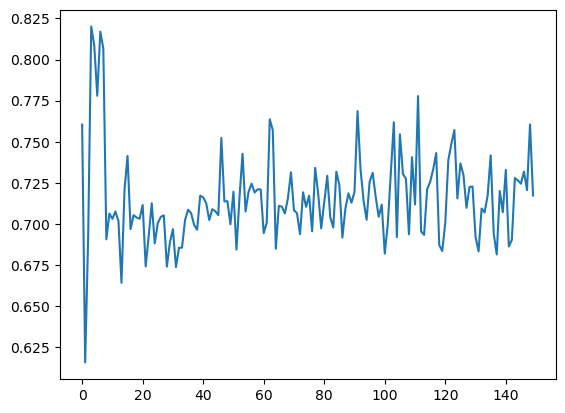

In [22]:
plt.plot(history['gen'])

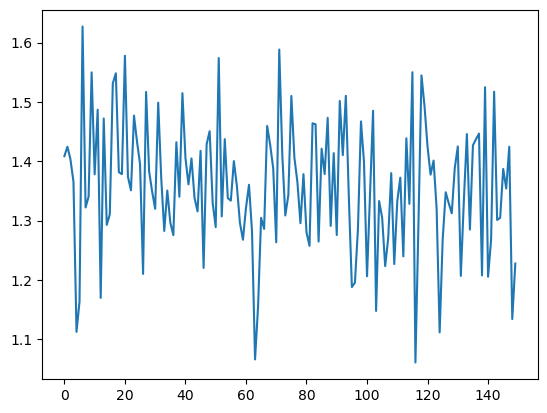

In [23]:
plt.plot(history['dis'])

In [24]:
!pip install mlxtend


In [25]:
# y_test=df.label
x_test=X_test.reshape(-1,1,52)


In [26]:
x_test.shape

(438, 1, 52)

In [27]:
y_pred=discriminator.predict(x_test)
from sklearn.metrics import average_precision_score, accuracy_score ,recall_score, f1_score
y_pred = np.squeeze(y_pred)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [28]:
y_pred = np.squeeze(y_pred)
y_pred.shape

(438,)

In [32]:
prob=[-0.2,-0.1,-0.05,0,0.005,0.1, 0.2, 0.3, 0.4]
for p in prob:
    pred_value =[1 if i<p   else 0 for i in y_pred]
    f1=f1_score(y_test,pred_value)
    acc=accuracy_score(y_test,pred_value)
    precision=average_precision_score(y_test,pred_value)
    recall= recall_score(y_test,pred_value)
    print(f'prob ={p} and f1 score ={f1} : accuracy={acc} : precision={precision} : recall={recall}')
    print(pred_value.count(0),pred_value.count(1))

prob =-0.2 and f1 score =0.34375000000000006 : accuracy=0.5205479452054794 : precision=0.6869992246058414 : recall=0.20754716981132076
383 55
prob =-0.1 and f1 score =0.4548104956268222 : accuracy=0.5730593607305936 : precision=0.7212802619109159 : recall=0.2943396226415094
360 78
prob =-0.05 and f1 score =0.47262247838616717 : accuracy=0.5821917808219178 : precision=0.7272421814422332 : recall=0.30943396226415093
356 82
prob =0 and f1 score =0.7627906976744185 : accuracy=0.7671232876712328 : precision=0.8457108171401271 : recall=0.6188679245283019
273 165
prob =0.005 and f1 score =0.765661252900232 : accuracy=0.769406392694064 : precision=0.8472011592505977 : recall=0.6226415094339622
272 166
prob =0.1 and f1 score =0.7746478873239436 : accuracy=0.7077625570776256 : precision=0.7055169848853585 : recall=0.8301886792452831
135 303
prob =0.2 and f1 score =0.7357664233576643 : accuracy=0.58675799086758 : precision=0.6002464030326526 : recall=0.9509433962264151
18 420
prob =0.3 and f1 sco

In [30]:
pred_value

[1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

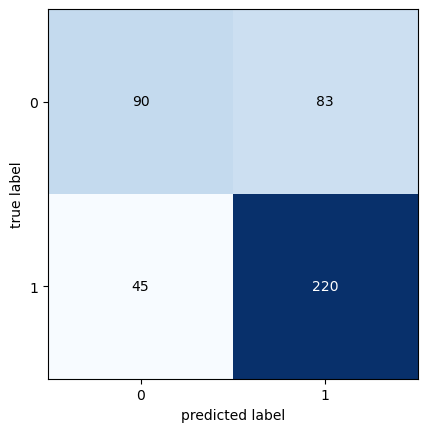

In [31]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test,pred_value)
plot_confusion_matrix(conf_mat=mat)